# Welcome to the final project!
In this notebook you will be asked to use singular value decomposition and SVM to classify images. We will be working with the MNIST numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

First, we import the necessary libraries.

In [1]:
import numpy as np
from numpy.linalg import svd
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Now, we read both training and test dataset as arrays. 

In [2]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

In [3]:
X_test_total.shape, X_train_total.shape, y_train_total.shape, y_test_total.shape

((10000, 28, 28), (60000, 28, 28), (60000,), (10000,))

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [4]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [5]:
train_indx = [y == num1 or y == num2 for y in y_train_total] 
test_indx = [y == num1 or y == num2 for y in y_test_total] # your code here
 

In [6]:
print(len(train_indx))

60000


Form new arrays consisting of the data with the target values num1 and num2 only. 

In [7]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx] # your code here

The following two cells ensure automatic grading.

In [8]:
import sys
sys.path.append("..")

import grading
grader = grading.Grader(assignment_key="5QcKcr06RZWNXOR6ZubzOg", 
                      all_parts=["EGrPV", "LtYil", "otUqA", "o4nIb", "rZkTW", "keYiw"])

In [9]:
# token expires every 30 min
COURSERA_TOKEN = 'z7sdXZ72iSRbyo6o' # YOUR COURSERA TOKEN HERE (can be found in Programming section)
COURSERA_EMAIL = 'bharani1990@gmail.com' # YOUR COURSERA EMAIL HERE

## Looking at the data

Let us check the sizes of the datasets and the shape of one image.

In [10]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [11]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [12]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

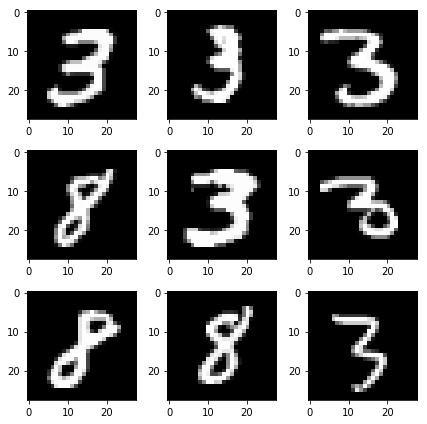

In [13]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

Target values are numbers.

In [14]:
y_train[:9]

array([3, 3, 3, 8, 3, 3, 8, 8, 3], dtype=uint8)

## Task 1 (1 point)
Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [15]:
def flatten_image(X):
    return X.flatten()# your code here

In [16]:
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test]) # your code here
X_test_flat.shape, X_test_flat.shape

((1984, 784), (1984, 784))

PCA works best when the data is scaled (think, why?), so let's scale our data. We will use [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. Note, that scaling replaces a collection of vectors x by the collection of the vectors $x' = (x-M)/D$, where $M$ is the mean vector of
the sample, $D$ is the vector of standard deviations of all components of the vectors, and the division is component-wise. So, the scaled collection has the same size as the original one, and each column has 0 mean and unit standard deviation.


In [17]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

## Question 1

Please write your answer on the impact of scaling below. Why does scaling help PCA? If your idea need some computer experiments for confirmation (say, training and accuracy calculations  with non-scaled data), please provide the code here as well.

***Your answer here.***

First things first
Test accuracy without scaling:  0.944556451613
Test accuracy with scaling: 0.96622983871

Below code illustrates the difference

We could see a difference of 2% increase in the accuracy here. 

Why is Scaling important: 
Some features sometimes may contain values that are much higher than some other features. So, this could potentially create problems when we create components via PCA as each component is just the linear combination of few other features. If one feature is having a high variance from another, this will dominate the summand of the Linear combination. Hence PCA has a nice facility called Standard scalar which standardizes which in turn puts all the data in to the same scale which can be measured easily. 

Conclusion:
-----------------
                                                                                                                                
1) Scaling not only reduces the disturbances the data (noise) but also helps in deriving meaningful insights from the data.        
2) Scaling can help in creating different clouds on training data which can helpful while we apply the algorithm in test data



In [18]:
# Before PCA without scaling
X_train_flat_wo_scaling = np.array([flatten_image(img) for img in X_train])
X_test_flat_wo_scaling = np.array([flatten_image(img) for img in X_test])
X_train_flat_wo_scaling.shape, X_test_flat_wo_scaling.shape 

((11982, 784), (1984, 784))

###### Now, we call PCA and reduce the number of components for each vector.

In [19]:
# After PCA without scaling

pca = PCA(n_components=128, random_state=42)
X_train_flat_wo_scaling = pca.fit_transform(X_train_flat_wo_scaling)
X_test_flat_wo_scaling = pca.transform(X_test_flat_wo_scaling)
X_train_flat_wo_scaling.shape, X_test_flat_wo_scaling.shape 

((11982, 128), (1984, 128))

###### Prediction wo scaling

In [20]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat_wo_scaling, y_train) 

CPU times: user 2.21 s, sys: 0 ns, total: 2.21 s
Wall time: 2.27 s


In [21]:
y_pred_wo_scaling = clf.predict(X_test_flat_wo_scaling) # your code here
acc_wo_scaling = accuracy_score(y_true=y_test, y_pred=y_pred_wo_scaling) # your code here
print("Test accuracy without scaling: ", acc_wo_scaling)

Test accuracy without scaling:  0.944556451613


## Question 2

What is the ratio of the memory used for the data `compressed' by PCA and the one used for the original data?

***Your answer here.***                                                                                                          

Before PCA : 
X_train_flat.shape, X_test_flat.shape  = ((11982, 784), (1984, 784))                                                              

After PCA : 
X_train_flat.shape, X_test_flat.shape  = ((11982, 128), (1984, 128))    

So the answer is 128 / 784

What does the above two lines tell us - It is the following                                                                      
1) Before PCA we had 784 features for each single data in out data set. There could be a chance that some featuresa are redundant and some are nice. We have to distinguish between them, In comes, PCA.                                                   
2) So, what does PCA essentially do. It does calculate new features (components) as a linear combination of other features. It defines the principal components in a way that describes as much variation as possible from the original data with fewer new variables. So this is sequential as well. The first principle component refers to the highest variance, the second principle component refers to second highest and so on.                                                                                    
3) How many components to be chosen is determined by an inbuilt function of PCA called "explained_variance_ratio_"                 
4) Visual inspection can also be a useful trait to determine the number of components and what compoenents to be chosen




Now, we use SVM with linear kernel to separate the two classes.

In [22]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

CPU times: user 7.3 s, sys: 0 ns, total: 7.3 s
Wall time: 7.3 s


Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [23]:
y_pred = clf.predict(X_test_flat) # your code here
acc = accuracy_score(y_true=y_test, y_pred=y_pred) # your code here
print("Test accuracy: ", acc)

Test accuracy:  0.962701612903


In [24]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("EGrPV", acc)

In [26]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

TypeError: argument of type 'NoneType' is not iterable

## Try it from your own input
Try to make your own dataset. You can either make a photo image of an ink-written digit or draw a digit using a graphical editor of your computer or smartphone. Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset. It can be either in png or jpeg format. Replace the sample striwith your file name. 

In [27]:
from scipy import misc
from PIL import Image

In [28]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

In [29]:
y_train_computer = 'img_11.jpg', 'img_12.jpg', 'img_13.jpg', 'img_14.jpg', 'img_15.jpg', 'img_16.jpg', 'img_17.jpg', 'img_18.jpg', 'img_19.jpg', 'img_20.jpg', 'img_21.jpg', 'img_22.jpg', 'img_23.jpg', 'img_24.jpg', 'img_25.jpg', 'img_26.jpg', 'img_27.jpg', 'img_28.jpg', 'img_29.jpg', 'img_30.jpg'

In [30]:
x_train_computer = np.array([np.array(Image.open(fname)) for fname in y_train_computer])

In [31]:
y_test_computer = 'img_343.jpg','img_344.jpg','img_345.jpg'
x_test_computer = np.array([np.array(Image.open(fname)) for fname in y_test_computer])

In [32]:
y_true_computer = ['img_27.jpg' ,'img_28.jpg', 'img_29.jpg']

In [33]:
def flatten_image_comp(X):
    return X.flatten()# your code here

In [34]:
X_train_computer_flat = np.array([flatten_image_comp(img) for img in x_train_computer])
X_test_computer_flat = np.array([flatten_image_comp(img) for img in x_test_computer]) # your code here
X_train_computer_flat.shape, X_test_computer_flat.shape

((20, 784), (3, 784))

In [35]:
print('Data shapes from computer data: ')
print('X_train_comp: ', x_train_computer.shape)
# print('y_train_comp: ', y_train_computer.shape)
print('X_test_comp: ', x_test_computer.shape)
# print('y_test_comp: ', y_test_computer.shape)

Data shapes from computer data: 
X_train_comp:  (20, 28, 28)
X_test_comp:  (3, 28, 28)


In [36]:
scaler_computer = StandardScaler()
X_train_computer_flat = scaler_computer.fit_transform(X_train_computer_flat)
X_test_computer_flat = scaler_computer.transform(X_test_computer_flat)


In [37]:
pca_computer = PCA(n_components=20, random_state=42)
X_train_computer_flat = pca_computer.fit_transform(X_train_computer_flat)
X_test_computer_flat = pca_computer.transform(X_test_computer_flat)
X_train_computer_flat.shape, X_test_computer_flat.shape

((20, 20), (3, 20))

Re-shape your image and make a prediction. 

In [38]:
# custom = flatten_image_comp(custom).reshape(1, -1)
# custom = scaler.transform(custom)
# custom = pca.transform(custom)
# custom.shape


In [39]:
from sklearn.multiclass import OneVsRestClassifier

In [40]:
%%time
clf_computer = OneVsRestClassifier(LinearSVC(random_state = 42))

CPU times: user 13 µs, sys: 5 µs, total: 18 µs
Wall time: 21.5 µs


In [41]:
clf_computer.fit(X_train_computer_flat, y_train_computer)   

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [42]:
y_pred_computer = clf_computer.predict(X_test_computer_flat) # your code here


In [43]:
print(y_pred_computer)

['img_22.jpg' 'img_24.jpg' 'img_29.jpg']


In [44]:
acc_computer = accuracy_score(y_true=y_true_computer, y_pred=y_pred_computer) # your code here
print("Test acc_compuracy: ", acc_computer)

Test acc_compuracy:  0.333333333333


## Question 3

Repeat the above digit recognition procedure with other 5 to 10 hand-written images. Do your experiments confirm the above accuracy estimate? How do you think, why they confirm (or not confirm) it?

***Your answer here.***

The task was done in the following setup

Training data count = 20
Test data count = 3
labels are hard coded to the y_true
y_pred is predicted via Multiclass classifier

Inference: 

The algorithm worked beautifully when the training data was huge which resulted in a good accuracy rate. 
However with small training data, the algorithm fails to predict the correct digit as it dished out 2/3 wrong with only 33% accuracy. 

The reasons are as follows:

1) less number of training data
2) New Data is indeed new to the algorithm as it hasnt learned from the small data set


Take away: 

Sufficient data is must for training the algorithm so that it predicts correctly when it stumbles on a new data

## Task 2
Now let's try another approach explained [here](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) in Section 3. For each digit, we create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit. Given an unrecognized flatten image, among average typical flattened images we find the closets one. Its target value is considered as a prediction for the target of the unrecognized image.

## SVD refesher
As you may recall from the lectures, SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.
Please note that due to large shapes of matrices the operations might take a while.

In [45]:
def getSingularVectorsLeft(matrix, number=10): # let's take first 10 numbers
    # return first _number_ columns of U from SVD of _matrix_
    U, sigma, V_T = svd(matrix)
    first_specified_columns = U[:, :number]
    return first_specified_columns

In [46]:
def getSingularImage(X_train, y_train, number):
    # find images whose target is _number_ 
    image_index = [image == number for image in y_train]
    select_images = X_train[image_index]
#     print(select_images)
    A = None
    for image in select_images:
    # iteratively append new column to form matrix A
#         print(image.shape)
        flattened = np.array([flatten_image(image)])
        if A is not None:
            A = np.append(A, flattened.transpose(), axis=1)            
        else:
            A = flattened.transpose()
        
    # left_basis = # get left singular vectors
    left_basis = getSingularVectorsLeft(A, 10)
    
    return left_basis

Try it first on "0".

In [47]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)

In [48]:
assert left_basis.shape == (784, 10)

### Task 2.1 (1 point)
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28. Use `numpy.reshape`.

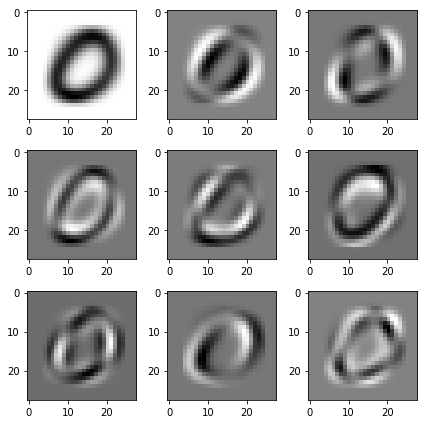

In [49]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b): 
#     print(i)
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape((28, 28)) # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

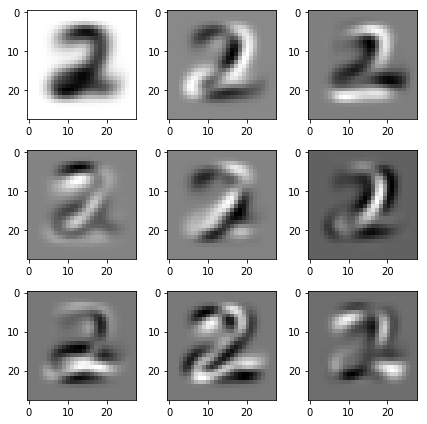

In [50]:
left_basis = getSingularImage(X_train_total, y_train_total, 2)
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b): 
#     print(i)
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape((28, 28)) # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [51]:
## GRADED PART, DO NOT CHANGE!
#9th image will be graded:
grader.set_answer("LtYil", img[:, 5:7].flatten())

In [52]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

TypeError: argument of type 'NoneType' is not iterable

## Question 4

Reflect on properties of the columns of $U_k$. What properties do you think are contained in each of them? Draw more singular images to help you make conclusions.

***Your answer here.***

The columns of U are nothing but Eigen numbers for the given data set containing the numbers.
The properties is as follows                                                                                                      

1) The columns of U are hierarchically arranged. They basically describe the variance of columns of the original Matrix A        

2) They provide with me basis with which i can represent the columns of the original Matrix A. (ie), i can write each vector (column of A) as a linear combination of the columns of U.                                                                        

3) The most important vector is the first vector and the importance order is decreasing.                                

4) The columns of U are obtained by multiplying Eigenvectors(A.A_T) written column wise. The first 'm' columns of U are only important because the size of A is n * m (meaning, X can span only 'm' columns)                                                                                                                  

5) Over the long run, other columns gain low importance and can be conveniently neglected because they get multiplied with low values of Eigen values from the sigma matrix                                                                                      

6) The Matrix A will be of Data Type (dimension) (n rows and m columns) - Why?                                                    
The first column of U (n * 1) is multiplied with first singular value (1 * 1) is multiplied with first row of V (1 * m) 

Now let's move on and obtain singular images for all numbers. The matrices $U_k$ from  [the article](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) are represented as `number_basis_matrices[k]`.
This might take a while to finish, feel free to add debug print in your function to know the progress.

In [ ]:
number_basis_matrices = [] # use getSingularImage funciton to get matrices for all numbers


for i in range(10):
    print("digit: ", i)
    number_basis_matrices.append(getSingularImage(X_train_total, y_train_total, i))
    


digit:  0


### Task 2.2 (1 point)
Plot the first singular image of each digit, similarly to the previous task.

In [ ]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    # first column of U_k in number_basis_matrices[i] reshaped into 28x28 image
    img = number_basis_matrices[i][:, 0].reshape((28, 28)) 
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [63]:
## GRADED PART, DO NOT CHANGE!
#last image (of digit 9) will be graded:
grader.set_answer("otUqA", img[:, 5:7].flatten())

In [64]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


In [65]:
dim = number_basis_matrices[0].shape[0]

In [66]:
print(dim)

784


### Task 2.3 (1.5 points)

Here we calculate the new projection matrix for each $U_k$ to apply later in testing:
$pr = (I - U_k \cdot U_{k}^{T})$. Use `numpy.matmul` for matrix multiplication and `numpy.identity` to create an identity matrix. Please note that this operation might also take some time to finish.

In [67]:
numeric_values = [] # create an array of pr for each number
for i in range(10):
    identity_matrix = np.identity(number_basis_matrices[i].shape[0])
    bracket_matrix = np.matmul(number_basis_matrices[i], number_basis_matrices[i].transpose())
    projection_matrix = identity_matrix - bracket_matrix
    numeric_values.append(projection_matrix)

In [68]:
## GRADED PART, DO NOT CHANGE!
k = np.array([n[3:5, 3:13] for n in numeric_values])
grader.set_answer("o4nIb", k.flatten())

In [69]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


### Task 2.4 (1.5 points)
Implement function utilizing `numeric_values` matrices to predict labels for unknown images. Use `numpy.norm` and enumerate to iterate over numeric values.

In [73]:
def find_closest(test_value, numeric_values):
    stacked_test = test_value.reshape(-1, 1)
    # find closest U_k to test_value using norm and return the target digit
    projection_matrix_dict = {}
    
    for k, v in enumerate(numeric_values):
        value = norm(np.matmul(v, stacked_test))
        projection_matrix_dict[k] = value    
    
    def closest(k):
        return projection_matrix_dict[k]

    target = min(projection_matrix_dict.keys(), key = closest)

    return target

In [74]:
y_pred = [find_closest(im, numeric_values) for im in X_test]
# find array of predictions for test values and calculate accuracy in the cell below

In [75]:
acc = accuracy_score(y_test, y_pred)

In [76]:
print(acc)

0.930443548387


In [77]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("rZkTW", acc)

In [78]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## Additional task (2 points)
In the first task we trained Linear SVM to separate 3s and 8s. Here you can implement multiclass classification for _all_ numbers in `MNIST`. Use the same function LinearSVC for “one-vs-the-rest” multi-class strategy, see [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).  Follow the same steps from task 1: scaling, feature selection, training and testing. Is the accuracy of this method greater then the one calculated above?

**Note:** Use `random_state=42` for `PCA` and `LinearSVC`. Training `LinearSVC` on all the data might take a while, that's normal.

In [79]:
#Flatten
X_train_total_flat = np.array([flatten_image(img) for img in X_train_total])
X_test_total_flat = np.array([flatten_image(img) for img in X_test_total]) 
X_test_total_flat.shape, X_test_total_flat.shape

((10000, 784), (10000, 784))

In [80]:
#Standard Scaler
scaler = StandardScaler()
X_train_total_flat = scaler.fit_transform(X_train_total_flat)
X_test_total_flat = scaler.transform(X_test_total_flat)

In [81]:
#PCA
pca = PCA(n_components=128, random_state=42)
X_train_total_flat = pca.fit_transform(X_train_total_flat)
X_test_total_flat = pca.transform(X_test_total_flat)
X_test_total_flat.shape, X_test_total_flat.shape

((10000, 128), (10000, 128))

In [87]:
y_train_total.shape

(60000,)

In [83]:
%%time
# LinearSVC
clf = OneVsRestClassifier(LinearSVC(random_state = 42))
clf.fit(X_train_total_flat, y_train_total) 

CPU times: user 3min 20s, sys: 21.5 s, total: 3min 42s
Wall time: 3min 42s


In [94]:
#Prediction
y_pred_total = clf.predict(X_test_total_flat) # your code here

In [95]:
y_pred_total.shape

(10000,)

In [96]:
y_test_total.shape

(10000,)

In [97]:
# accuracy
acc = accuracy_score(y_true=y_test_total, y_pred=y_pred_total) # your code here
print("Test accuracy: ", acc)

Test accuracy:  0.9096


In [98]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("keYiw", acc)

In [99]:
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!
